In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import preprocessing
import algorithms
import plots

In [2]:
DATA_PATH_1 = Path("../data/data1.txt")
DATA_PATH_2 = Path("../data/data2.txt")

# Part 1

## Linear regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file ex1data1.txt contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [3]:
data = preprocessing.read_data(DATA_PATH_1)
x, y = preprocessing.split_input_output(data, (0,), (1,))
x = preprocessing.include_intercept(x)

### Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)

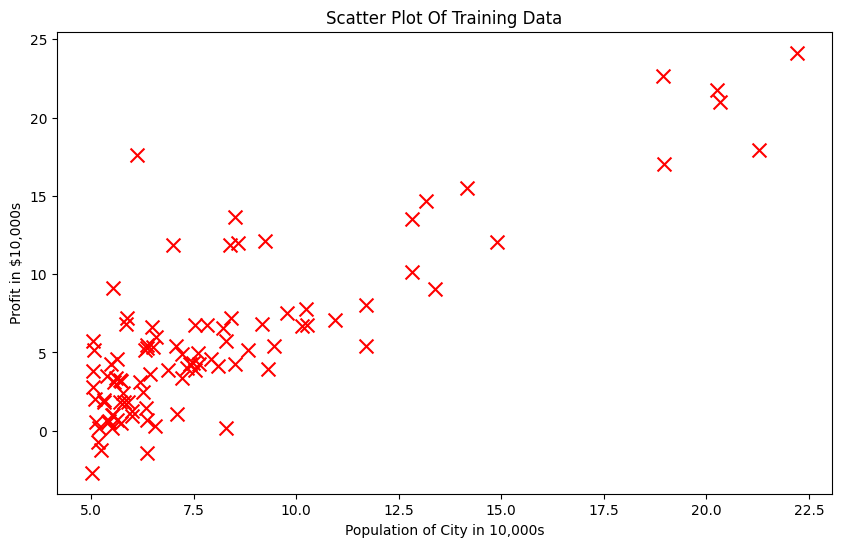

In [4]:
plots.scatter(
    x[:, 1],
    y,
    title="Scatter Plot Of Training Data",
    x_label="Population of City in 10,000s",
    y_label="Profit in $10,000s",
)

## Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.

### Update Equations
The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$

where the hypothesis $h_{\theta}(x)$ is given by the linear model

$$h_{\theta}(x) = \theta_0 + \theta_1x$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, ..., \theta_n)$$

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [5]:
model = algorithms.LinearRegressionGD()

### Verify the initial setup
Once you have completed the function, the next step in ex1.m will run
computeCost once using $\theta$ initialized to zeros, and you will see the cost
printed to the screen.
You should expect to see a cost of 32.07.

In [6]:
# the expected value of cost is 32.07
model.theta = np.array([0, 0])
cost = model.cost(x, y)
print("Part 1:\n")
print("Computed cost with initial value of theta:\n")
print(f"{cost: .2f}\n")

Part 1:

Computed cost with initial value of theta:

 32.07



### Computing the cost J(θ)
As you perform gradient descent to learn minimize the cost function $J(\theta)$,
it is helpful to monitor the convergence by computing the cost. In this
section, you will implement a function to calculate $J(\theta)$ so you can check the
convergence of your gradient descent implementation

In [7]:
model.fit(x, y)
theta_history, cost_history = model.theta_history, model.cost_history

### Verify the results
Assuming you have implemented gradient descent and
computeCost correctly, your value of $J(\theta)$ should never increase, and should
converge to a steady value by the end of the algorithm.

In [8]:
# the expected value of cost is 4.48
model.theta = np.array([-3.790995518545798, 1.1825257582787547])
cost = model.cost(x, y)
print("Computed cost with optimized value of theta:\n")
print(f"{cost: .2f}\n")

Computed cost with optimized value of theta:

 4.48



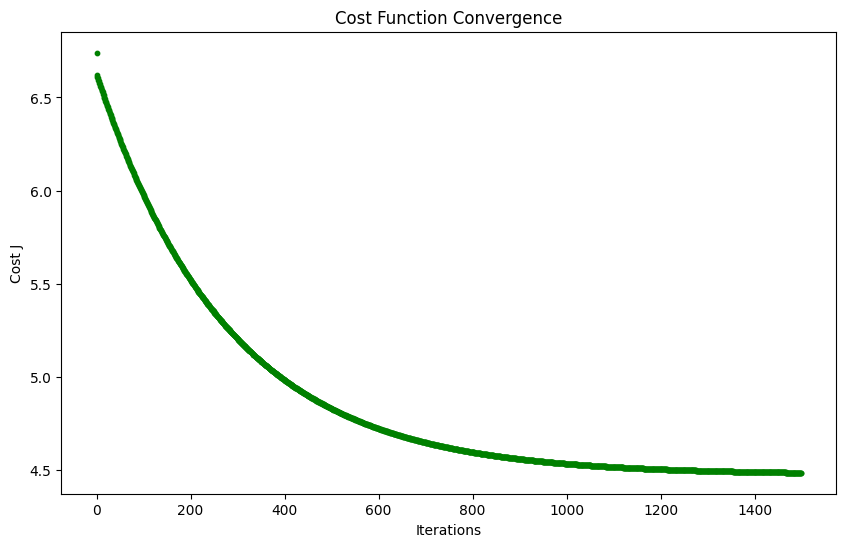

In [9]:
plots.plot_cost_function(np.array(cost_history))

### Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, you will now plot the cost over
a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything
new for this part, but you should understand how the code you have written
already is creating these images.

After these lines are executed, you will have a 2-D array of $J(\theta)$ values.
The script ex1.m will then use these values to produce surface and contour
plots of $J(\theta)$ using the surf and contour commands.

The purpose of these graphs is to show you that how $J(\theta)$ varies with
changes in $\theta_0$ and $\theta_1$ . The cost function $J(\theta)$ is bowl-shaped and has a global
mininum. (This is easier to see in the contour plot than in the 3D surface
plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$ , and each step of
gradient descent moves closer to this point.

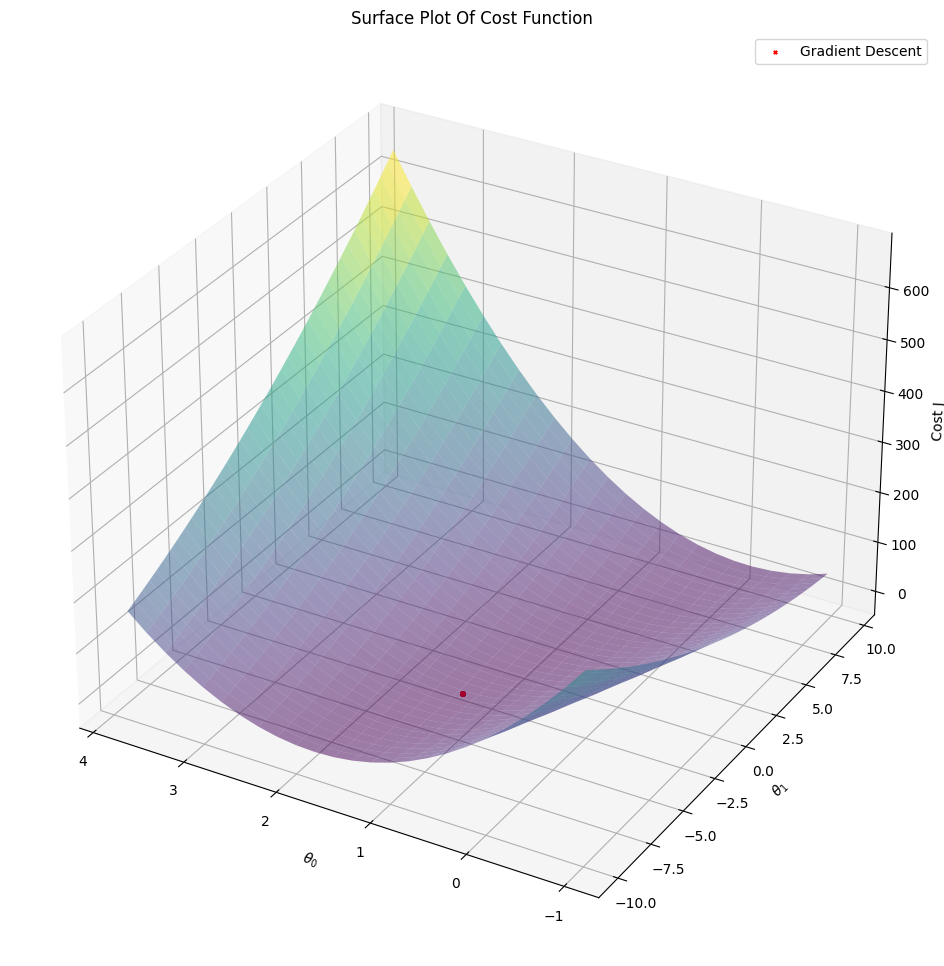

In [10]:
plots.plot_cost_function_3d(model, x, y)

### Plot the linear regression fit
After you are finished, ex1.m will use your final parameters to plot the
linear fit.

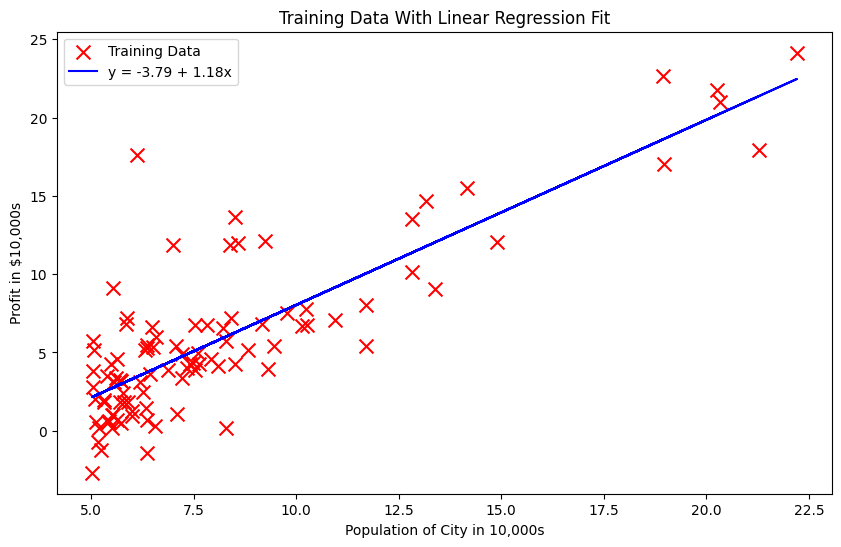

In [11]:
plots.plot_regression_fit(
    x, y, model, x_label="Population of City in 10,000s", y_label="Profit in $10,000s"
)

### Predictions using the optimized $\theta$ values
Your final values for $\theta$ will also be used to make predictions on profits in
areas of 35,000 and 70,000 people. Note the way that the following lines in
ex1.m uses matrix multiplication, rather than explicit summation or loop-
ing, to calculate the predictions.

In [12]:
predict1 = model.predict([1, 35000])
predict2 = model.predict([1, 70000])
print(f"Predicted profit in the area of 35,000 people: {predict1: .2f}$.\n")
print(f"Predicted profit in the area of 70,000 people: {predict2: .2f}$.\n")

Predicted profit in the area of 35,000 people:  41384.61$.

Predicted profit in the area of 70,000 people:  82773.01$.



# Part 2

## Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [13]:
data = preprocessing.read_data(DATA_PATH_2)
x, y = preprocessing.split_input_output(data, (0, 1), (2,))
x = preprocessing.include_intercept(x)

### Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it.

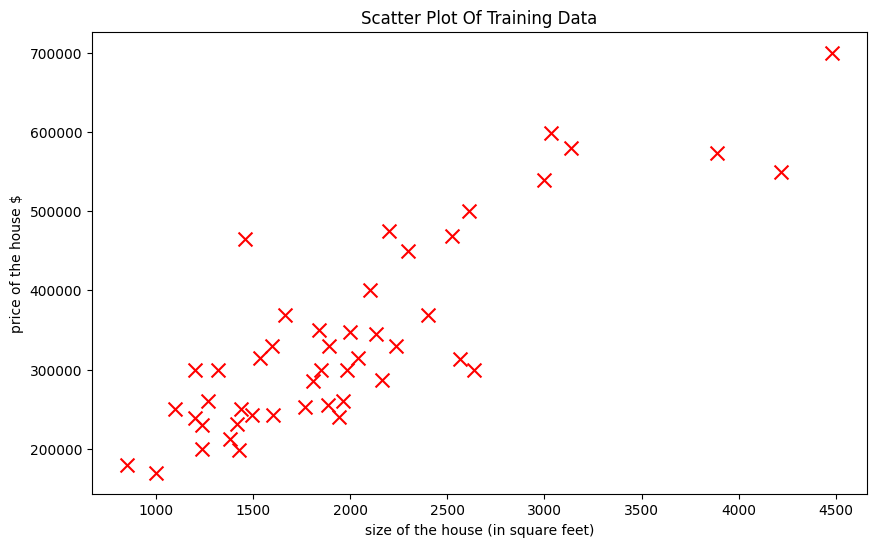

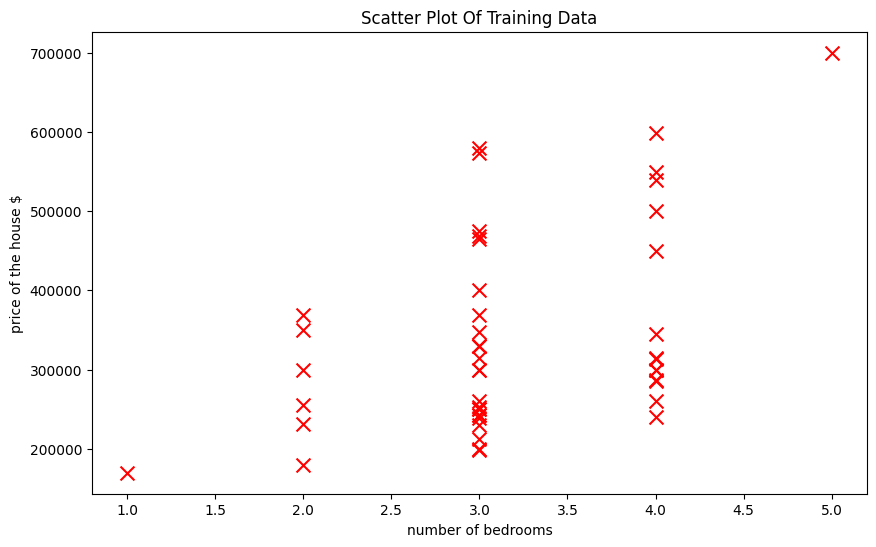

In [14]:
plots.scatter(
    x[:, 1],
    y,
    title="Scatter Plot Of Training Data",
    x_label="size of the house (in square feet)",
    y_label="price of the house $",
)
plots.scatter(
    x[:, 2],
    y,
    title="Scatter Plot Of Training Data",
    x_label="number of bedrooms",
    y_label="price of the house $",
)

## Feature Normalization
The ex1 multi.m script will start by loading and displaying some values
from this dataset. By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code in featureNormalize.m to

* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature value by their respective “standard deviations.”

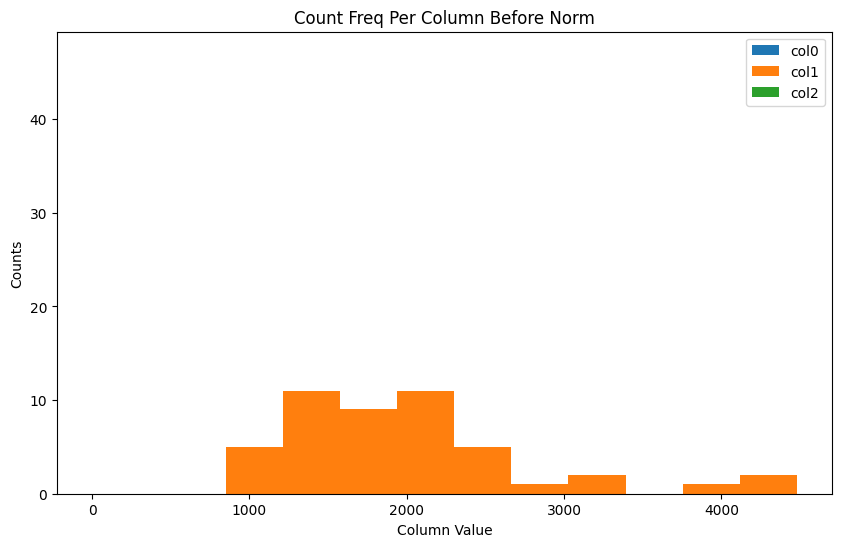

In [15]:
plots.plot_histogram(x, "Count Freq Per Column Before Norm")

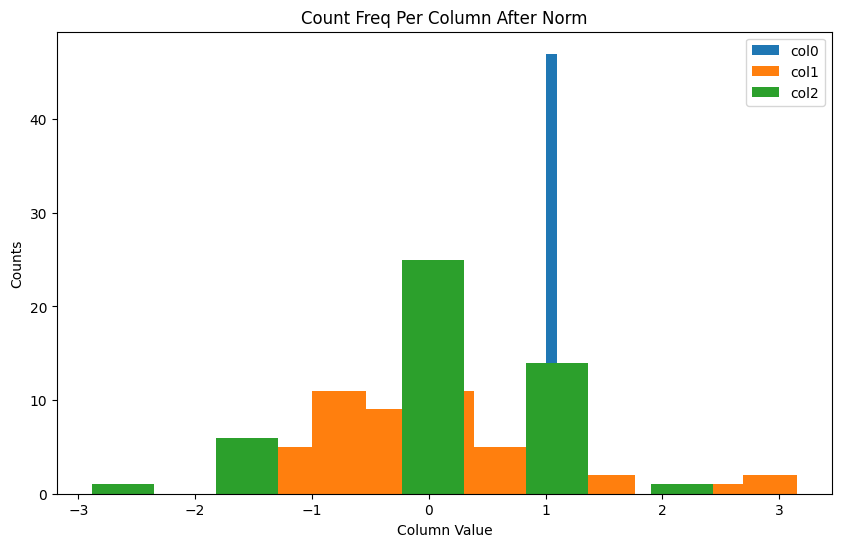

In [16]:
x_norm = x.copy()
normalizer = preprocessing.FeatureNormalizer(x_norm, excluded_columns=(0,))
x_norm = normalizer.normalize(x_norm)
plots.plot_histogram(x_norm, "Count Freq Per Column After Norm")

## Gradient Descent
Previously, you implemented gradient descent on a univariate regression
problem. The only difference now is that there is one more feature in the
matrix X. The hypothesis function and the batch gradient descent update
rule remain unchanged.
You should complete the code in computeCostMulti.m and gradientDescentMulti.m
to implement the cost function and gradient descent for linear regression with
multiple variables. If your code in the previous part (single variable) already
supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.

In [17]:
model = algorithms.LinearRegressionGD()
model.fit(x_norm, y)
theta_history, cost_history = model.theta_history, model.cost_history

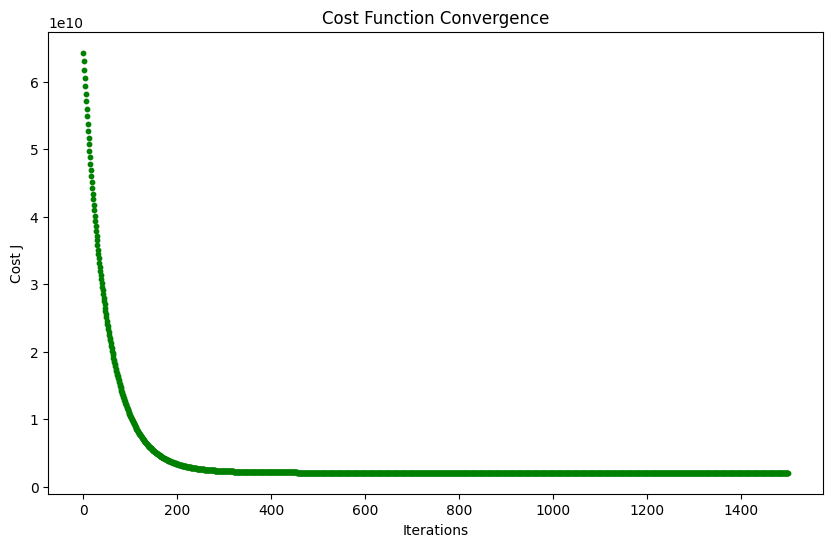

In [18]:
plots.plot_cost_function(np.array(cost_history))

## Make predictions
Using the best learning rate that you found, run the ex1 multi.m script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of θ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the
normal equations. Don’t forget to normalize your features when you make
this prediction!

In [19]:
house_size = 1650
num_bedrooms = 3
values = [1, house_size, num_bedrooms]

In [20]:
# the expected result is 293083
result = model.predict(normalizer.normalize(values))
print("\nPart 2:\n")
print(
    "Prediction using means and stds for price of house with 1650 square feet and 3 bedrooms:\n"
)
print(f"{result: .2f}$\n")


Part 2:

Prediction using means and stds for price of house with 1650 square feet and 3 bedrooms:

 293098.47$



## Normal Equations
In the lecture videos, you learned that the closed-form solution to linear
regression is

$$\theta = (X^TX)^{-1}X^Ty$$

Using this formula does not require any feature scaling, and you will get
an exact solution in one calculation: there is no “loop until convergence” like
in gradient descent.

Complete the code in normalEqn.m to use the formula above to calcu-
late $\theta$. Remember that while you don’t need to scale your features, we still
need to add a column of 1’s to the X matrix to have an intercept term ($\theta_0$).
The code in ex1.m will add the column of 1’s to X for you.

Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent

In [21]:
model = algorithms.LinearRegressionNE()
model.fit(x, y)

In [22]:
# the expected result is 293083
result = model.predict(values)
print(
    "\nNormal equation prediction for price of house with 1650 square feet and 3 bedrooms:\n"
)
print(f"{result: .2f}$\n")


Normal equation prediction for price of house with 1650 square feet and 3 bedrooms:

 293081.46$

